**Tasks 7a-7b - HOMEWORK**

In this task, we evaluated the impact of uncertainty in fiber span lengths on QoT estimation using a neural network model. Random Gaussian noise with 0 mean and standard deviation equal to 5%, 10%, and 15% of the maximum span length was introduced to simulate real-world deviations.

For each noise level, we:

Generated uncertain features using a modified span matrix

Trained a neural network (logistic activation, 2 layers, 10 neurons/layer)

Evaluated prediction accuracy using MSE and max error

Computed the minimal safety margin required to avoid modulation format overestimation

Results showed that as uncertainty increases:

The model's prediction error slightly increases (MSE and max error)

A larger safety margin is needed to ensure reliability

However, the neural network remains robust, maintaining good R² scores and small margins (1.2–1.4 dB)

These findings confirm that accurate QoT estimation is possible even with moderate uncertainty, and neural networks can tolerate some noise when trained properly.


==== Noise level: 5% ====
Training a NN...
Total number of iterations: 1744
Current loss: 0.065
Training time [s]: 4.285
Final training R2 score is: 0.971
Final training MSE is: 0.129


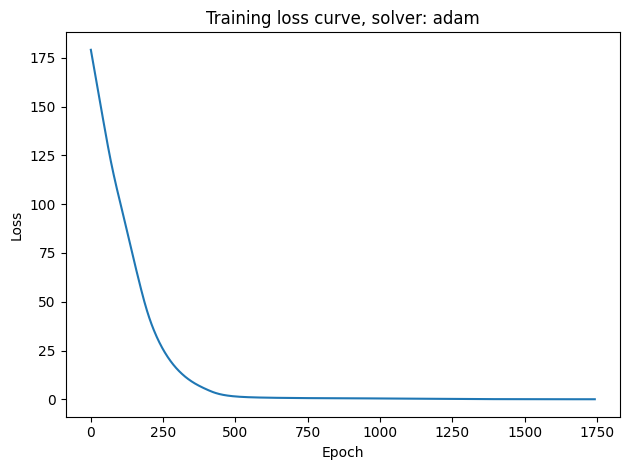

Performance evaluation:
MSE: 0.12 dB

Max error: 1.31 dB

Minimal margin to avoid disruptions: 1.2 dB

Error histogram:
-1.3 dB: 1 times
-1.0 dB: 1 times
-0.7 dB: 6 times
-0.6 dB: 2 times
-0.5 dB: 8 times
-0.4 dB: 19 times
-0.3 dB: 17 times
-0.2 dB: 13 times
-0.1 dB: 32 times
0.0 dB: 18 times
0.1 dB: 28 times
0.2 dB: 21 times
0.3 dB: 12 times
0.4 dB: 11 times
0.5 dB: 10 times
0.6 dB: 4 times
0.7 dB: 2 times
0.9 dB: 1 times
1.1 dB: 1 times


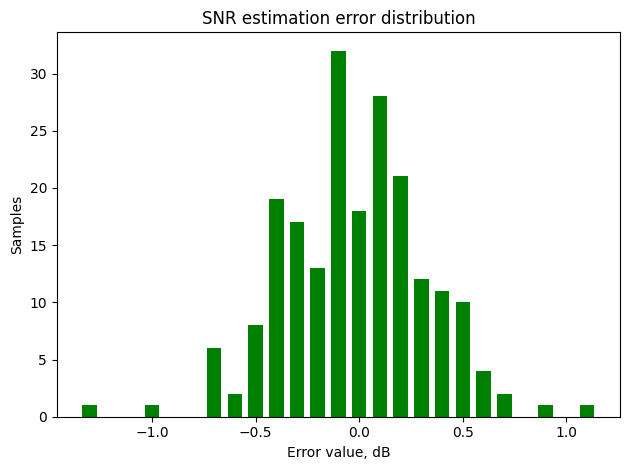


==== Noise level: 10% ====
Training a NN...
Total number of iterations: 1744
Current loss: 0.069
Training time [s]: 3.261
Final training R2 score is: 0.969
Final training MSE is: 0.137


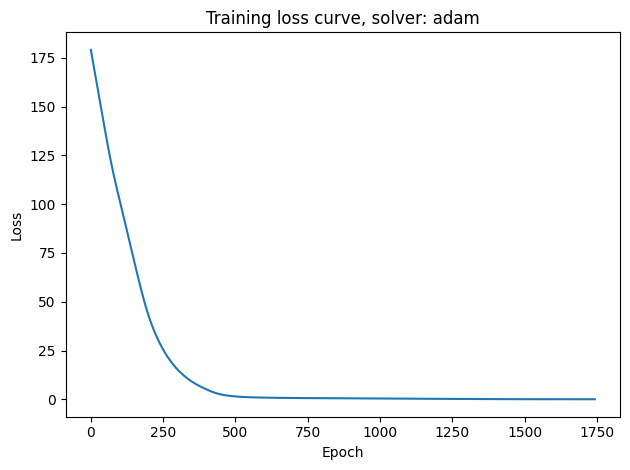

Performance evaluation:
MSE: 0.13 dB

Max error: 1.35 dB

Minimal margin to avoid disruptions: 1.3 dB

Error histogram:
-1.3 dB: 1 times
-0.9 dB: 1 times
-0.8 dB: 2 times
-0.7 dB: 2 times
-0.6 dB: 6 times
-0.5 dB: 4 times
-0.4 dB: 18 times
-0.3 dB: 20 times
-0.2 dB: 18 times
-0.1 dB: 17 times
0.0 dB: 19 times
0.1 dB: 27 times
0.2 dB: 22 times
0.3 dB: 20 times
0.4 dB: 10 times
0.5 dB: 7 times
0.6 dB: 6 times
0.7 dB: 3 times
0.8 dB: 2 times
1.0 dB: 1 times
1.1 dB: 1 times


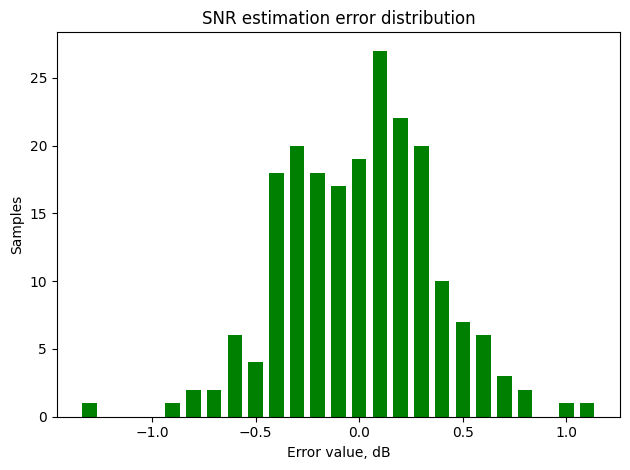


==== Noise level: 15% ====
Training a NN...
Total number of iterations: 1748
Current loss: 0.073
Training time [s]: 3.243
Final training R2 score is: 0.968
Final training MSE is: 0.145


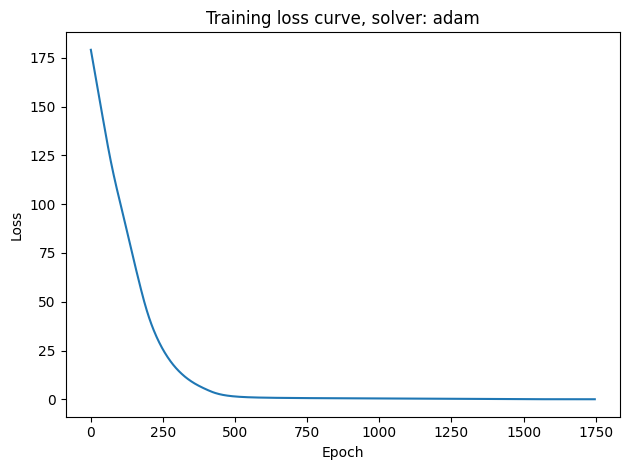

Performance evaluation:
MSE: 0.14 dB

Max error: 1.38 dB

Minimal margin to avoid disruptions: 1.3 dB

Error histogram:
-1.4 dB: 1 times
-1.0 dB: 1 times
-0.8 dB: 3 times
-0.7 dB: 4 times
-0.6 dB: 3 times
-0.5 dB: 7 times
-0.4 dB: 12 times
-0.3 dB: 13 times
-0.2 dB: 24 times
-0.1 dB: 24 times
0.0 dB: 23 times
0.1 dB: 31 times
0.2 dB: 12 times
0.3 dB: 18 times
0.4 dB: 7 times
0.5 dB: 6 times
0.6 dB: 6 times
0.7 dB: 7 times
0.8 dB: 2 times
0.9 dB: 1 times
1.0 dB: 1 times
1.2 dB: 1 times


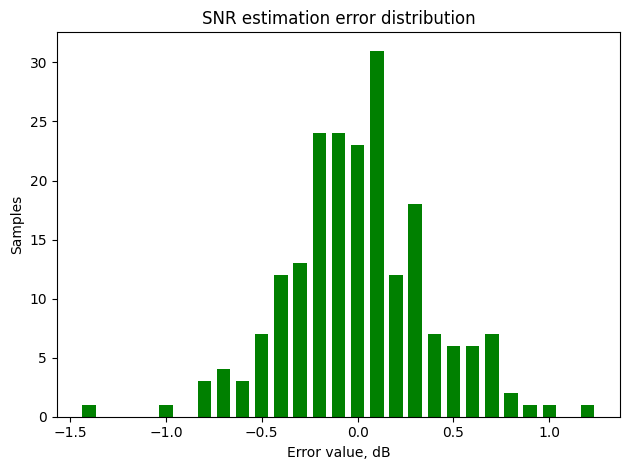

In [ ]:

# QoT Estimation - Task 7a & 7b - Homework Submission

## Imports and Utility Functions

import numpy as np
import random
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, max_error

def read_dataset(filename):
    span_length_matrix = []
    interferer_matrix = []
    SNR_vect = []
    with open(filename) as data_file:
        for line in data_file:
            elements = line.split(';')
            spans = list(map(float, elements[0].split()))
            span_length_matrix.append(spans)
            num_interf = int(elements[1])
            delta_f = float(elements[2])
            interferer_matrix.append([num_interf, delta_f])
            snr = float(elements[3])
            SNR_vect.append(snr)
    return span_length_matrix, interferer_matrix, SNR_vect

def SNR_to_MF(SNR):
    if SNR < 11:
        return 0
    elif SNR > 11 and SNR < 15:
        return 4
    elif SNR > 15 and SNR < 18:
        return 8
    elif SNR > 18 and SNR < 20.8:
        return 16
    elif SNR > 20.8 and SNR < 23.7:
        return 32
    else:
        return 64

def find_minimal_margin(SNR_true_vect, SNR_pred_vect):
    margin = 0
    margin_step = 0.1
    for _ in range(100):
        disruption_flag = False
        for SNR_true, SNR_pred in zip(SNR_true_vect, SNR_pred_vect):
            MF_true = SNR_to_MF(SNR_true)
            MF_pred = SNR_to_MF(SNR_pred - margin)
            if MF_pred > MF_true:
                disruption_flag = True
                break
        if not disruption_flag:
            return margin
        margin += margin_step
    return margin

def perf_eval(y_true, y_pred):
    error_dict = {}
    print('MSE: {} dB\n'.format(round(mean_squared_error(y_true, y_pred), 2)))
    print('Max error: {} dB\n'.format(round(max_error(y_true, y_pred), 2)))
    min_margin_dB = round(find_minimal_margin(y_true, y_pred), 2)
    print('Minimal margin to avoid disruptions: {} dB\n'.format(min_margin_dB))
    for yt, yp in zip(y_true, y_pred):
        err = round(yt - yp, 1)
        error_dict[err] = error_dict.get(err, 0) + 1
    print('Error histogram:')
    for k in sorted(error_dict):
        print(f"{k} dB: {error_dict[k]} times")
    plt.bar(list(error_dict.keys()), error_dict.values(), color='g', width=0.07)
    plt.xlabel('Error value, dB')
    plt.ylabel('Samples')
    plt.title('SNR estimation error distribution')
    plt.tight_layout()
    plt.show()

def train_NN(X_tr, y_tr, activ, neur, lyrs, solv_name='adam'):
    print('Training a NN...')
    size = (neur,) * lyrs
    model = MLPRegressor(hidden_layer_sizes=size, activation=activ, solver=solv_name,
                         learning_rate='invscaling', max_iter=5000, random_state=42, verbose=False)
    t0 = time.time()
    model.fit(X_tr, y_tr)
    t1 = time.time()
    training_time = round(t1 - t0, 3)
    yhat = model.predict(X_tr)
    mse = mean_squared_error(y_tr, yhat)
    r2 = model.score(X_tr, y_tr)
    print('Total number of iterations: ' + str(model.n_iter_))
    print('Current loss: ' + str(round(model.loss_, 3)))
    print('Training time [s]: ' + str(training_time))
    print('Final training R2 score is: ' + str(round(r2, 3)))
    print('Final training MSE is: ' + str(round(mse, 3)))
    plt.plot(model.loss_curve_)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training loss curve, solver: {}'.format(solv_name))
    plt.tight_layout()
    plt.show()
    return model, training_time

## Task 7a: Define extract_UNCERTAIN_features()

def extract_UNCERTAIN_features(span_matrix, interferer_matrix, span_length_std=0):
    X_matrix = []
    for i in range(len(span_matrix)):
        noisy_spans = []
        for s in span_matrix[i]:
            noisy_span = s + random.gauss(0, span_length_std)
            noisy_span = max(noisy_span, 0)
            noisy_spans.append(noisy_span)

        feature_vector = [
            len(noisy_spans),
            sum(noisy_spans),
            max(noisy_spans),
            interferer_matrix[i][0],
            interferer_matrix[i][1]
        ]
        X_matrix.append(feature_vector)
    return np.array(X_matrix)

## Task 7b: Run for 5%, 10%, and 15% of max span length

datafile = 'SNR_dataset_0.25dB_per_km.txt'
span_matrix, interferer_matrix, snr_values = read_dataset(datafile)
y = np.array(snr_values)
max_span_length = max([max(spans) for spans in span_matrix])
noise_levels = [0.05, 0.10, 0.15]
activation = 'logistic'
neurons = 10
layers = 2

for noise_pct in noise_levels:
    std_dev = noise_pct * max_span_length
    print(f"\n==== Noise level: {int(noise_pct*100)}% ====")
    X = extract_UNCERTAIN_features(span_matrix, interferer_matrix, span_length_std=std_dev)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    NNregr, train_duration = train_NN(X_train, y_train, activation, neurons, layers)
    y_predicted = NNregr.predict(X_test)
    print("Performance evaluation:")
    perf_eval(y_test, y_predicted)
